# 1: Problem Introduction & motivation <a class="anchor" id="Intro"></a>

Problem: In recent years, house prices have surged significantly in various regions, making homeownership increasingly unattainable for many individuals. This price escalation, coupled with economic challenges, has intensified the barriers to entering the housing market. The objective of this analysis is to identify key factors driving these escalating housing prices and to understand how various economic indicators correlate with this upward trend.

as you can see in the following articles<b>
    https://www.cnn.com/2023/08/24/homes/home-affordability-worst-since-1984/index.html
    https://www.cbsnews.com/news/homes-for-sale-affordable-housing-prices/
    
Objective: To predict/classify towns as high or low value based on features, large lots, proximity to rivers, and average number of rooms

Motivation: Understanding town value can assist in decisions related to real estate investments, urban planning, and local government policies. Predictive modeling can provide insights that might not be apparent through a simple analysis, potentially leading to more informed decisions

# 2:Data Preparation<a class="anchor" id="Data_Preparation"></a>

# 2.1 Get  Data <a class="anchor" id="Get_data"></a>

In this section, we're preparing our data environment for analysis.

[Back to Outline](#Outline)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving High Value Township.xlsx to High Value Township.xlsx


In [ ]:

#Import necessary libraries (allow us to manipulate data and access machine learning algorithms)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#This is how we load a Dataset
# Specify the path to your Excel file
file= 'High Value Township.xlsx'
# Read the Excel file into a dataframe
df = pd.read_excel(file)


# Display the first few rows of the dataframe (to see if data matches)
print(df.head())

   high_value_town  large_lots  industrial_land  river_side  mean_rooms  \
0                0        0.18             2.31           0       6.575   
1                0        0.00             7.07           0       6.421   
2                1        0.00             7.07           0       7.185   
3                1        0.00             2.18           0       6.998   
4                1        0.00             2.18           0       7.147   

   pupil_teacher_ratio  
0                 15.3  
1                 17.8  
2                 17.8  
3                 18.7  
4                 18.7  


# 2.2 Clean Data<a class="anchor" id="Clean_data"></a>

Data often comes with inconsistencies, missing values, or other issues that can hinder our analysis. In this section, we'll apply various preprocessing steps to ensure our data is clean and ready for modeling.

[Back to Outline](#Outline)

In [ ]:
# Checking for missing values in the data
print(df.isnull().sum())

high_value_town        0
large_lots             0
industrial_land        0
river_side             0
mean_rooms             0
pupil_teacher_ratio    0
dtype: int64


There are no missing values

# 2.3 Explore data<a class="anchor" id="Explore"></a>

It is important to understand the dataset's statistics. This step gives an idea about data distribution, central tendency, and range for each feature.

[Back to Outline](#Outline)

In [ ]:
# Statistical overview
print(df.describe())
# This will include count, mean, standard deviation, min, max, and percentile values.

       high_value_town  large_lots  industrial_land  river_side  mean_rooms  \
count       506.000000  506.000000       506.000000  506.000000  506.000000   
mean          0.166008    0.113636        11.136779    0.069170    6.284634   
std           0.372456    0.233225         6.860353    0.253994    0.702617   
min           0.000000    0.000000         0.460000    0.000000    3.561000   
25%           0.000000    0.000000         5.190000    0.000000    5.885500   
50%           0.000000    0.000000         9.690000    0.000000    6.208500   
75%           0.000000    0.125000        18.100000    0.000000    6.623500   
max           1.000000    1.000000        27.740000    1.000000    8.780000   

       pupil_teacher_ratio  
count           506.000000  
mean             18.455534  
std               2.164946  
min              12.600000  
25%              17.400000  
50%              19.050000  
75%              20.200000  
max              22.000000  


# 3: Modeling<a class="anchor" id="Modeling"></a>

# 3.1 Splitting the Data<a class="anchor" id="Splitting_the_data"></a>
we need to partition our dataset into two: a training set and a test set. The training set is used to teach our model, while the test set is used to evaluate its performance.

[Back to Outline](#Outline)

In [ ]:
# Importing the function to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('high_value_town', axis=1)
y = df['high_value_town']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.2 Train the Model<a class="anchor" id="Train_Model"></a>
Now that our data is ready, it's time to train our model. The template will use whatever model needs to be used, but for now we'll use a Decision Tree Classifier.

In [ ]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

# 3.3 Evaluate the Model<a class="anchor" id="Evaluate_Model"></a>

After training our model, we need to evaluate its performance on the test data to understand how well it will generalize to new, unseen data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
!pip install matplotlib

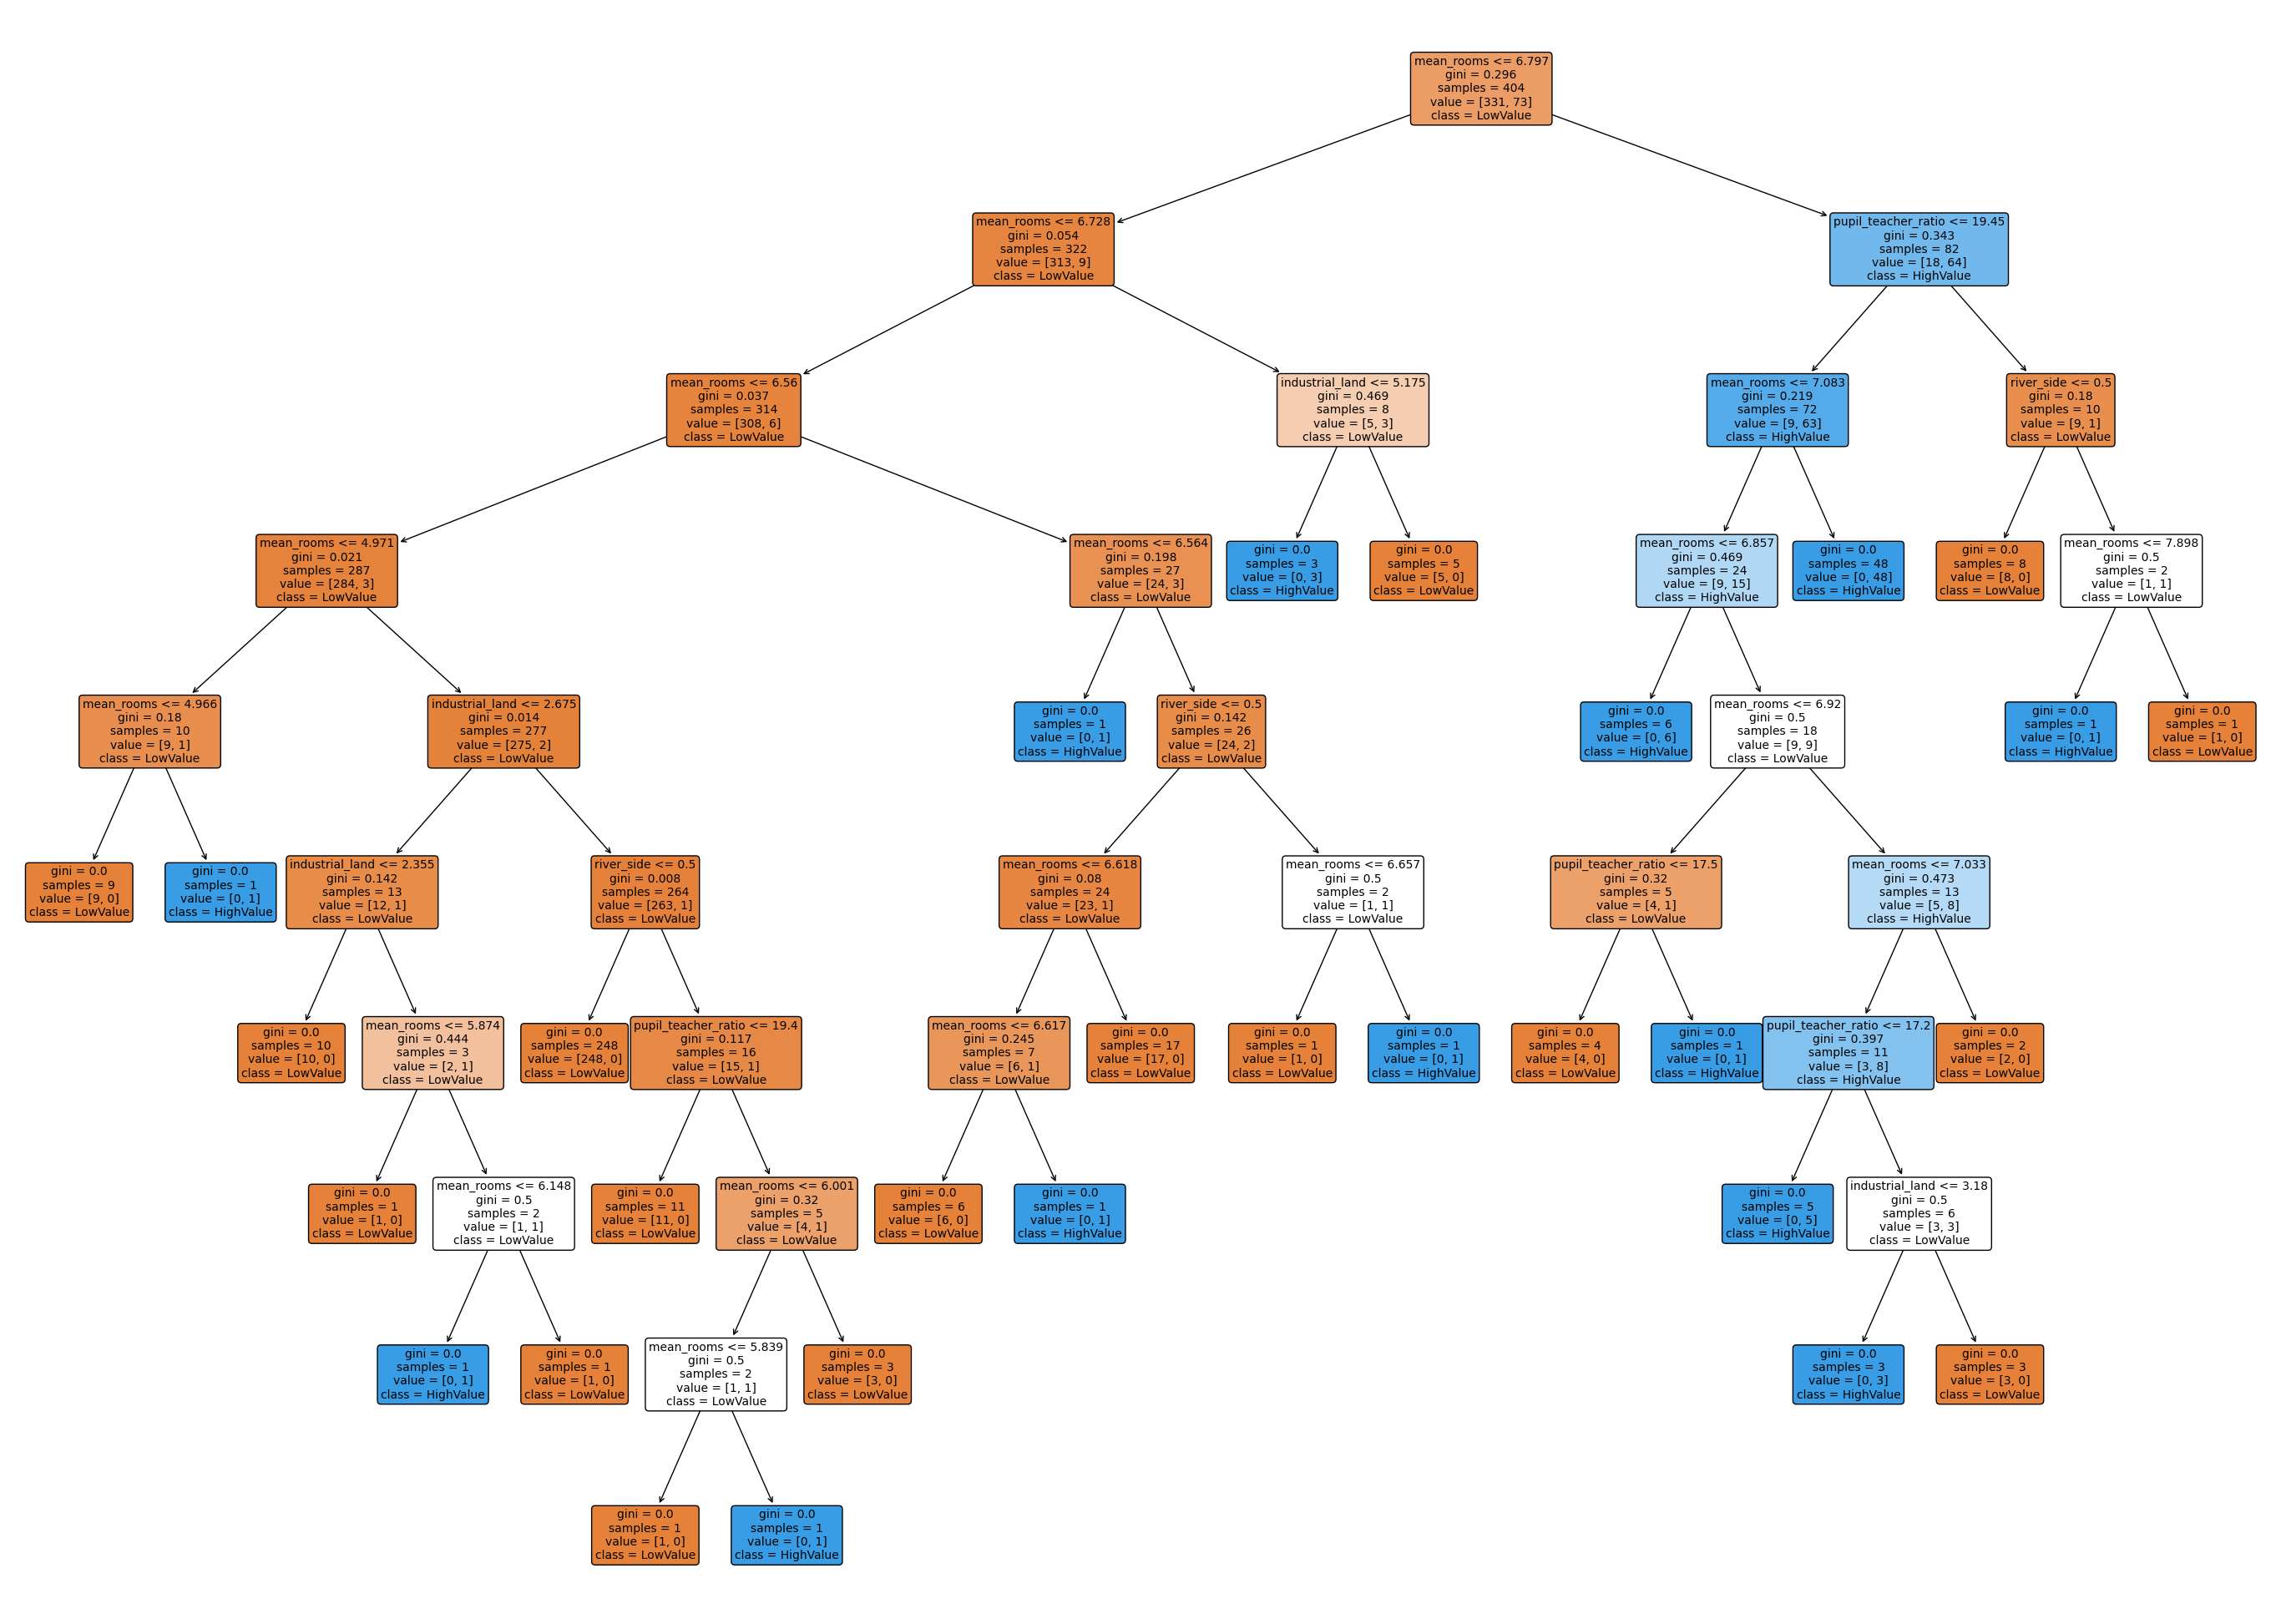

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set up the figure and axis
plt.figure(figsize=(35, 25))
plot_tree(classifier,
          feature_names=X_train.columns,
          class_names=['LowValue', 'HighValue'],
          filled=True, impurity=True,
          rounded=True, fontsize=10)
plt.show()

# 4: Summary & Conclusion<a class="anchor" id="Summary"></a>

[Back to Outline](#Outline)

Mean Rooms: This appears to be the most significant factor in determining house value. The tree splits first on this variable, with a threshold of 6.737 rooms. Houses with more rooms tend to be classified as high value.

Pupil-Teacher Ratio: For houses with more rooms, the pupil-teacher ratio becomes the next important factor. A lower ratio (≤ 19.45) tends to indicate higher value homes, likely reflecting better school quality in those areas.
Industrial Land: In areas with fewer rooms, the presence of industrial land becomes a deciding factor. Less industrial land (≤ 5.175) is associated with higher value homes.

River Side: This factor appears lower in the tree, suggesting it has less overall impact. However, for certain subgroups, being near a river (river_side ≤ 0.5) is associated with higher value.

Large Lots: While not prominently featured at the top of the tree, this factor does appear in some branches, indicating it has some influence on house values in certain contexts.